# Data cleaning & preproccesing

In [3]:
# importing the libraries 
import pandas as pd
import numpy as np

In [4]:
# Entering the File path
file_path='C:/Users/Admin\Desktop/DS PROJECT/crop production ML project/FAOSTAT_data.csv'
df=pd.read_csv(file_path)

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Admin\AppData\Local\Temp\ipykernel_11092\934416839.py:2: SyntaxWarning: invalid escape sequence '\D'
  file_path='C:/Users/Admin\Desktop/DS PROJECT/crop production ML project/FAOSTAT_data.csv'


In [5]:
df.head(10) # showing the first 10 values

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2019,2019,ha,29203.0,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2019,2019,kg/ha,1308.3,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371,"Almonds, in shell",2019,2019,t,38205.0,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2020,2020,ha,22134.0,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2020,2020,kg/ha,1775.9,A,Official figure,NaN
5,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371,"Almonds, in shell",2020,2020,t,39307.0,A,Official figure,NaN
6,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2021,2021,ha,36862.0,A,Official figure,NaN
7,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2021,2021,kg/ha,1743.2,A,Official figure,NaN
8,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371,"Almonds, in shell",2021,2021,t,64256.0,A,Official figure,NaN
9,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2022,2022,ha,36462.0,A,Official figure,NaN


In [6]:
# drop the unwanted columns
df1=df.drop(columns=['Domain Code','Area Code (M49)','Item Code (CPC)','Element Code','Year Code','Flag','Flag Description','Note'])

In [7]:
# checking the categorical  data
cat_value=[col for col in df1.columns if df[col].dtype=='object'] 
print('Categorical data :\n',cat_value)

num_value=[col for col in df1.columns if df[col].dtype!='object']
print('Numerical data :\n',num_value)          

Categorical data :
 ['Domain', 'Area', 'Element', 'Item', 'Unit']
Numerical data :
 ['Year', 'Value']


In [8]:
# Pivot the dataframe to get separate columns for Area harvested, Yield, and Production
data = df1.pivot_table(index=['Domain','Area', 'Item','Unit','Year'],
                              columns='Element',
                              values='Value',
                              aggfunc='first').reset_index()

# Flatten the multi-level columns
data.columns = [col if isinstance(col, str) else col[1] for col in data.columns]

# The dataframe now has separate columns for Area harvested, Yield, and Production
print(data.head())

                         Domain         Area               Item Unit  Year  \
0  Crops and livestock products  Afghanistan  Almonds, in shell   ha  2019   
1  Crops and livestock products  Afghanistan  Almonds, in shell   ha  2020   
2  Crops and livestock products  Afghanistan  Almonds, in shell   ha  2021   
3  Crops and livestock products  Afghanistan  Almonds, in shell   ha  2022   
4  Crops and livestock products  Afghanistan  Almonds, in shell   ha  2023   

   Area harvested  Laying  Milk Animals  Producing Animals/Slaughtered  \
0         29203.0     NaN           NaN                            NaN   
1         22134.0     NaN           NaN                            NaN   
2         36862.0     NaN           NaN                            NaN   
3         36462.0     NaN           NaN                            NaN   
4         37000.0     NaN           NaN                            NaN   

   Production  Stocks  Yield  Yield/Carcass Weight  
0         NaN     NaN    NaN     

In [9]:
# Check for null values
null_counts = data.isnull().sum()
null_percentage = (data.isnull().sum() / len(data)) * 100

print("Null values count:\n", null_counts)
print("Null values percentage:\n", null_percentage)

Null values count:
 Domain                                0
Area                                  0
Item                                  0
Unit                                  0
Year                                  0
Area harvested                   170227
Laying                           217065
Milk Animals                     216020
Producing Animals/Slaughtered    200565
Production                       135109
Stocks                           209526
Yield                            166563
Yield/Carcass Weight             211821
dtype: int64
Null values percentage:
 Domain                            0.000000
Area                              0.000000
Item                              0.000000
Unit                              0.000000
Year                              0.000000
Area harvested                   78.039958
Laying                           99.512671
Milk Animals                     99.033595
Producing Animals/Slaughtered    91.948306
Production                       61

In [10]:
# checking the duplicate values
duplicate=duplicated=data.duplicated().sum()
print("Number of Duplicated rows:",duplicate)

Number of Duplicated rows: 0


In [11]:
# Drop unwanted columns after sperate the row into columns
drop_columns=['Laying','Milk Animals','Producing Animals/Slaughtered','Stocks','Yield/Carcass Weight']
data.drop(columns=[col for col in drop_columns if col in data.columns],inplace=True)

In [12]:
# check duplicate after sperate the row into columns
dup=data[['Domain', 'Area', 'Item', 'Unit', 'Year', 'Area harvested', 'Production', 'Yield']].duplicated().sum()
print(dup)

0


In [13]:
data.head(100) # showing the 100 entries

,Domain,Area,Item,Unit,Year,Area harvested,Production,Yield
0,Crops and livestock products,Afghanistan,"Almonds, in shell",ha,2019,29203.0,NaN,NaN
1,Crops and livestock products,Afghanistan,"Almonds, in shell",ha,2020,22134.0,NaN,NaN
2,Crops and livestock products,Afghanistan,"Almonds, in shell",ha,2021,36862.0,NaN,NaN
3,Crops and livestock products,Afghanistan,"Almonds, in shell",ha,2022,36462.0,NaN,NaN
4,Crops and livestock products,Afghanistan,"Almonds, in shell",ha,2023,37000.0,NaN,NaN
...,...,...,...,...,...,...,...,...
95,Crops and livestock products,Afghanistan,Camels,An,2022,NaN,NaN,NaN
96,Crops and livestock products,Afghanistan,Camels,An,2023,NaN,NaN,NaN
97,Crops and livestock products,Afghanistan,Cantaloupes and other melons,ha,2019,37136.0,NaN,NaN
98,Crops and livestock products,Afghanistan,Cantaloupes and other melons,ha,2020,58942.0,NaN,NaN


In [14]:
data.tail(10) # showing the tail of the dataset

,Domain,Area,Item,Unit,Year,Area harvested,Production,Yield
218118,Crops and livestock products,Zimbabwe,"Vanilla, raw",kg/ha,2019,NaN,NaN,423.8
218119,Crops and livestock products,Zimbabwe,"Vanilla, raw",kg/ha,2020,NaN,NaN,430.3
218120,Crops and livestock products,Zimbabwe,"Vanilla, raw",kg/ha,2021,NaN,NaN,426.4
218121,Crops and livestock products,Zimbabwe,"Vanilla, raw",kg/ha,2022,NaN,NaN,426.8
218122,Crops and livestock products,Zimbabwe,"Vanilla, raw",kg/ha,2023,NaN,NaN,427.8
218123,Crops and livestock products,Zimbabwe,"Vanilla, raw",t,2019,NaN,9.88,NaN
218124,Crops and livestock products,Zimbabwe,"Vanilla, raw",t,2020,NaN,9.93,NaN
218125,Crops and livestock products,Zimbabwe,"Vanilla, raw",t,2021,NaN,9.92,NaN
218126,Crops and livestock products,Zimbabwe,"Vanilla, raw",t,2022,NaN,9.91,NaN
218127,Crops and livestock products,Zimbabwe,"Vanilla, raw",t,2023,NaN,9.92,NaN


In [15]:
# Fill missing values with column median

if 'Area harvested' in data.columns:
    data['Area harvested'].fillna(data['Area harvested'].median(),inplace=True)

if 'Production' in data.columns:
    data['Production'].fillna(data['Production'].median(),inplace=True)

if 'Yield' in data.columns:
    data['Yield'].fillna(data['Yield'].median(),inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11092\687065221.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Area harvested'].fillna(data['Area harvested'].median(),inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11092\687065221.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [16]:
# converting data into csv file after clean and preprocess
df2=pd.DataFrame(data)
df2.to_csv('agriculture.csv',index=False)

# Exploratory Data Analysis (EDA)

In [17]:
df2.describe() # use Describe to show the summary stats

,Year,Area harvested,Production,Yield
count,218128.000000,2.181280e+05,2.181280e+05,218128.000000
mean,2020.973447,3.995849e+04,3.800426e+05,7126.985148
std,1.403211,6.737062e+05,7.409016e+06,14257.767254
min,2019.000000,0.000000e+00,0.000000e+00,0.000000
25%,2020.000000,3.005000e+03,1.092277e+04,5216.200000
50%,2021.000000,3.005000e+03,1.092277e+04,5216.200000
75%,2022.000000,3.005000e+03,1.092277e+04,5216.200000
max,2023.000000,4.783200e+07,7.825858e+08,705196.700000


In [18]:
df2.describe(include='object').T

,count,unique,top,freq
Domain,218128,1,Crops and livestock products,218128
Area,218128,200,China,2585
Item,218128,275,"Hen eggs in shell, fresh",4543
Unit,218128,11,t,81895


In [19]:
df2.info() # showing the info in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218128 entries, 0 to 218127
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Domain          218128 non-null  object 
 1   Area            218128 non-null  object 
 2   Item            218128 non-null  object 
 3   Unit            218128 non-null  object 
 4   Year            218128 non-null  int64  
 5   Area harvested  218128 non-null  float64
 6   Production      218128 non-null  float64
 7   Yield           218128 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 13.3+ MB


In [20]:

df2.shape # check the shape of the dataset

(218128, 8)

In [21]:
# importing the libraries to visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Admin\AppData\Local\Temp\ipykernel_11092\3023568073.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item.values,y=item.index,palette='viridis')


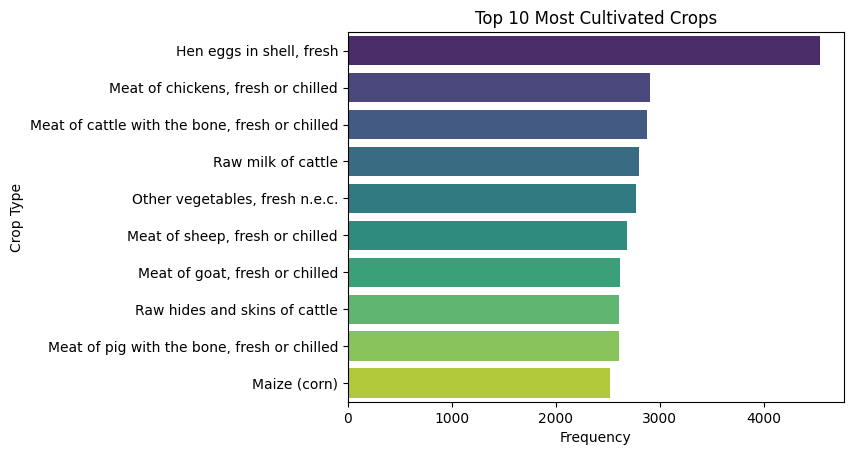

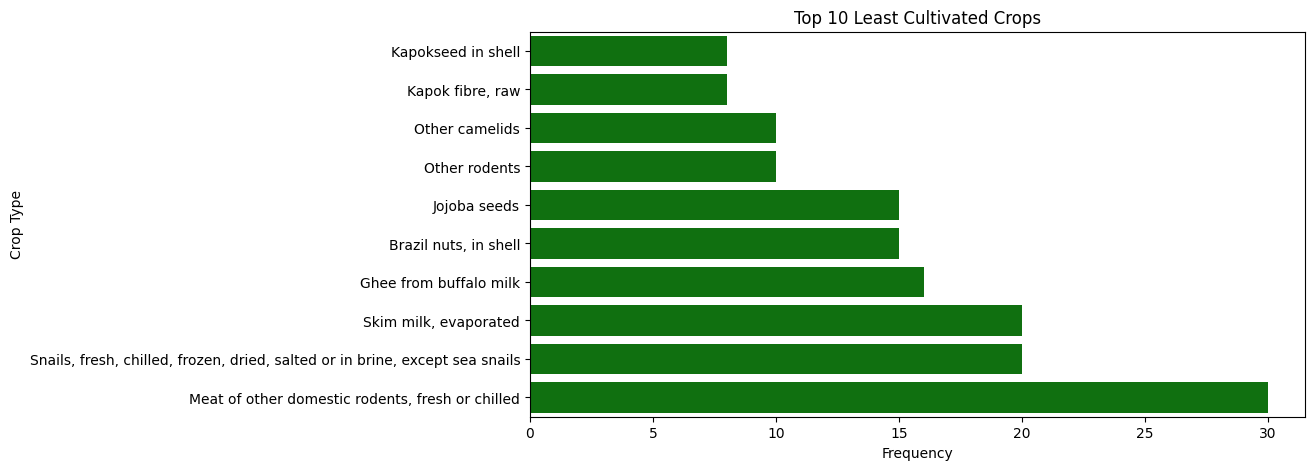

C:\Users\Admin\AppData\Local\Temp\ipykernel_11092\3023568073.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area.values,y=area.index,palette='magma')


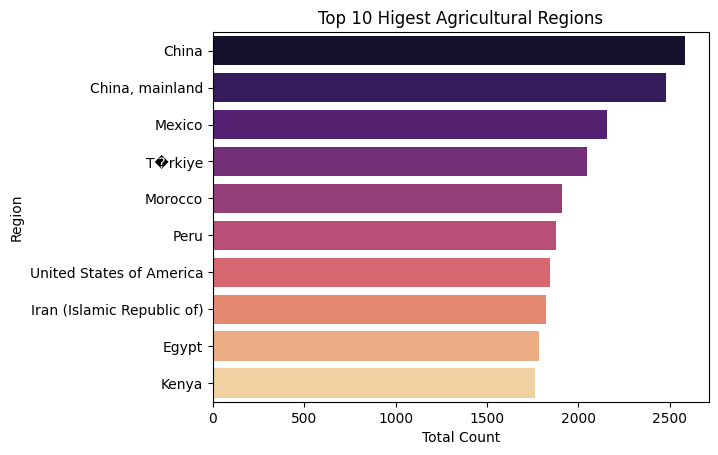

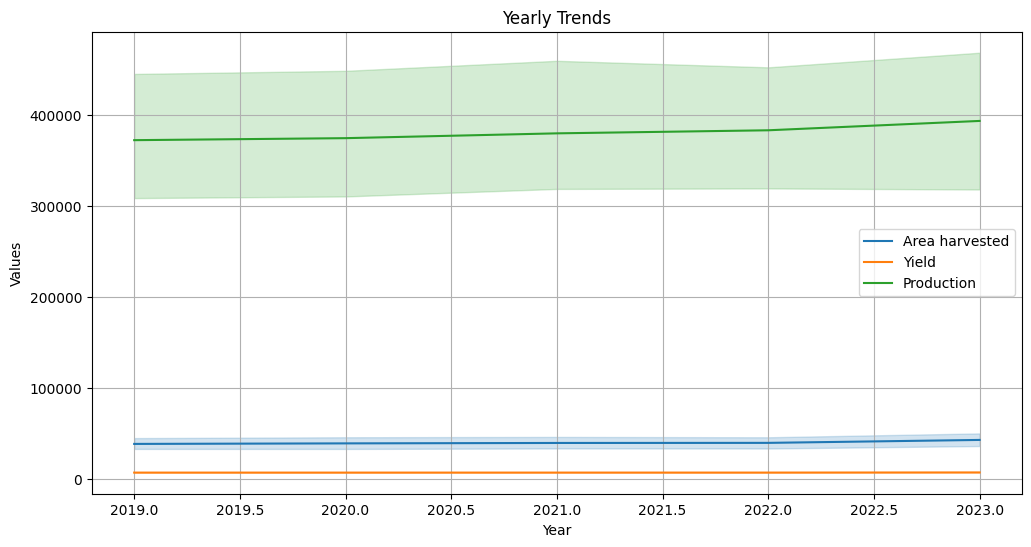

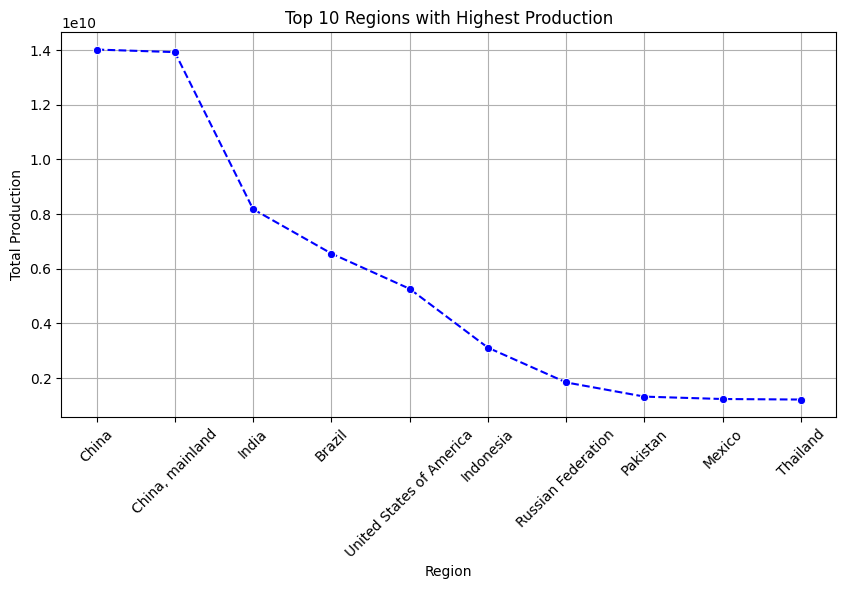

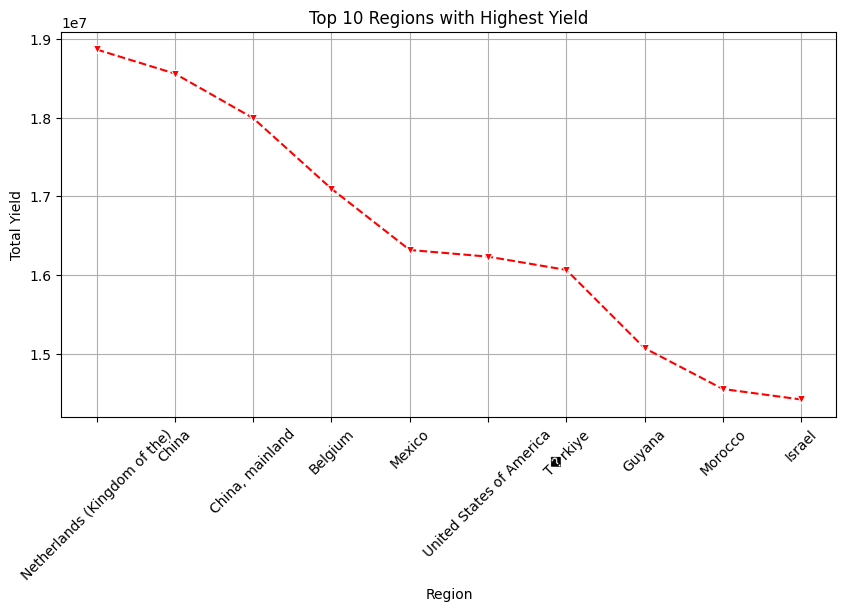

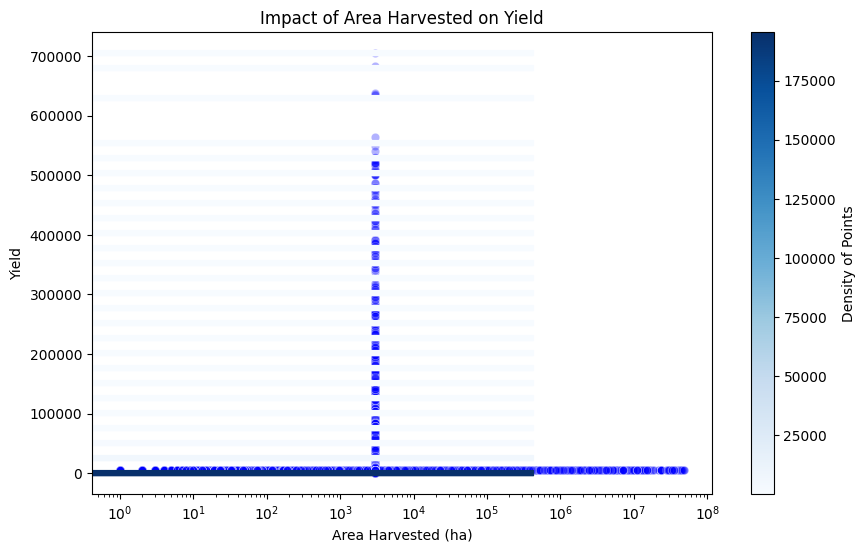

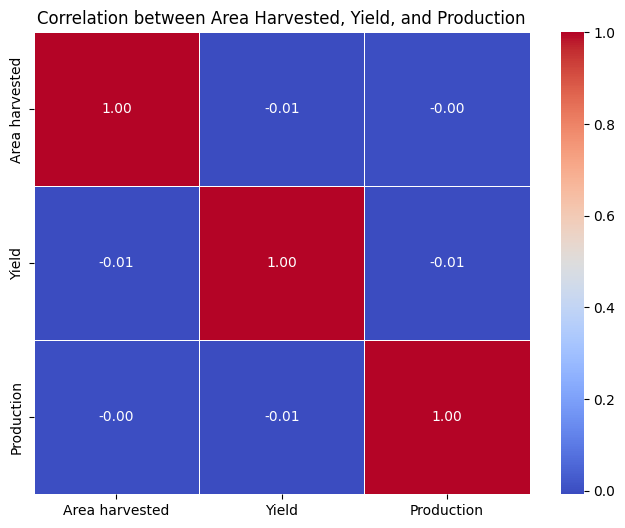

C:\Users\Admin\AppData\Local\Temp\ipykernel_11092\3023568073.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=crop_yield.index[:10], x=crop_yield.values[:10], palette="Greens_r")
C:\Users\Admin\AppData\Local\Temp\ipykernel_11092\3023568073.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=crop_yield.index[-10:], x=crop_yield.values[-10:], palette="Reds_r")


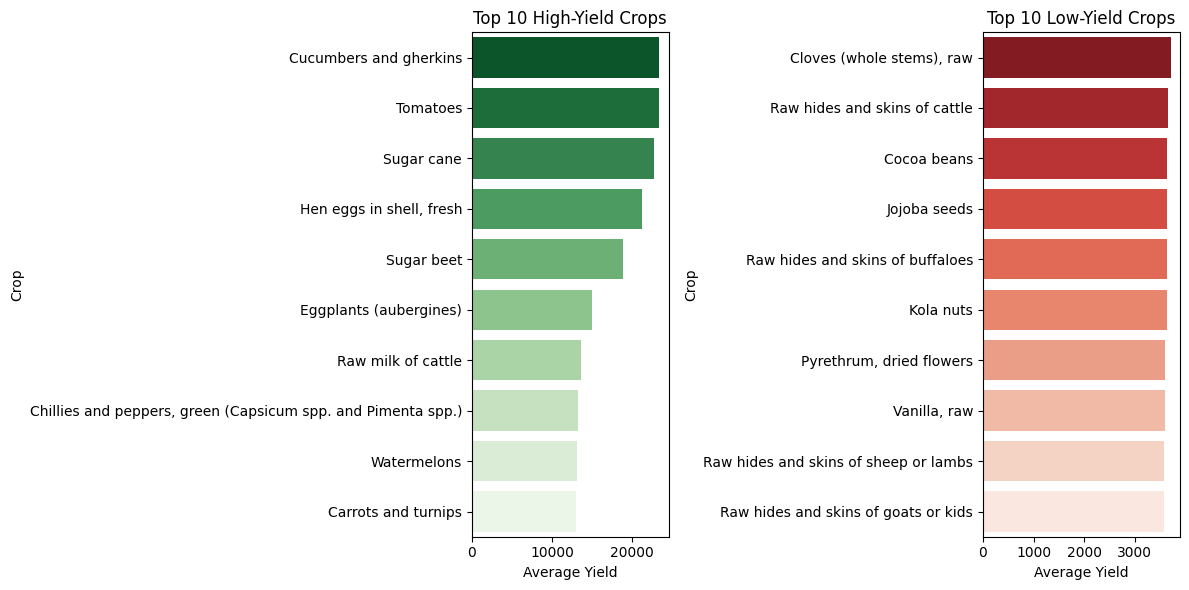

C:\Users\Admin\AppData\Local\Temp\ipykernel_11092\3023568073.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=region_production.index[:10],x=region_production.values[:10],palette='viridis')


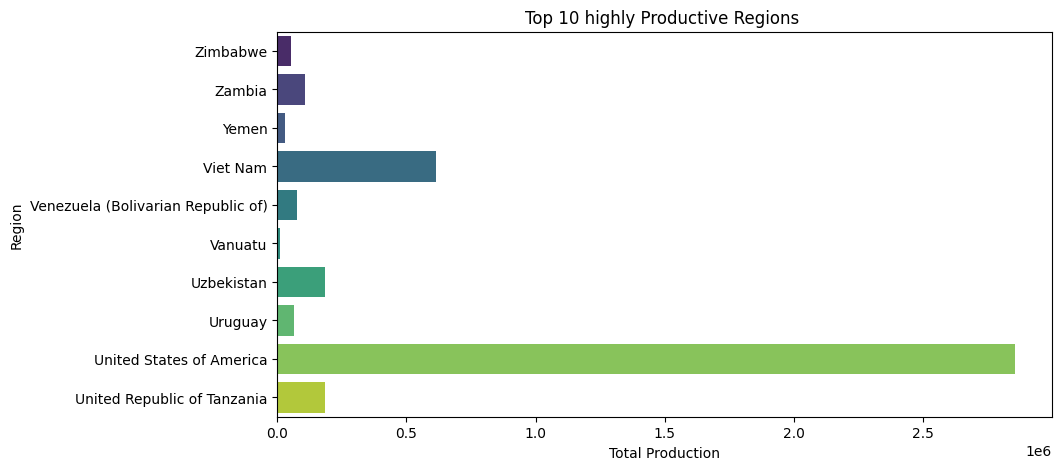

C:\Users\Admin\AppData\Local\Temp\ipykernel_11092\3023568073.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crop.index,y=crop.values,palette='viridis')


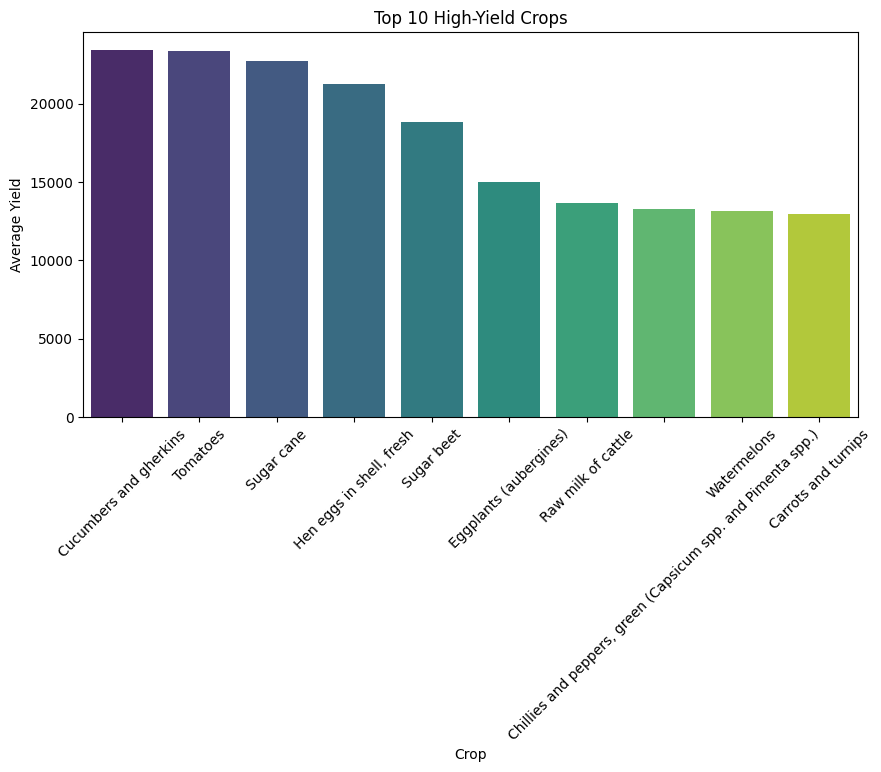

C:\Users\Admin\AppData\Local\Temp\ipykernel_11092\3023568073.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region.index,y=region.values,palette='viridis')


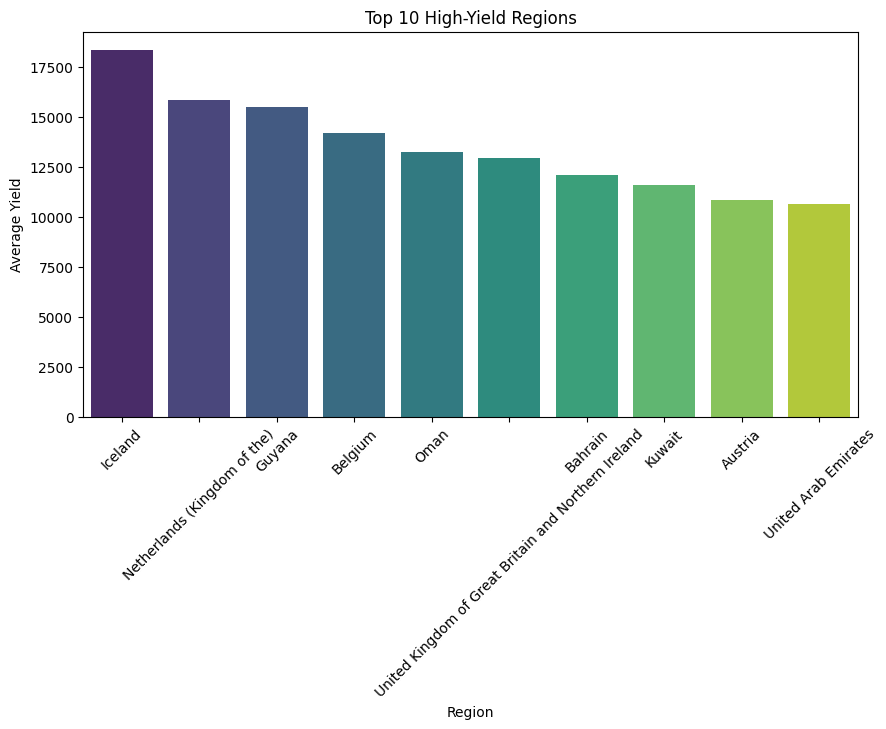

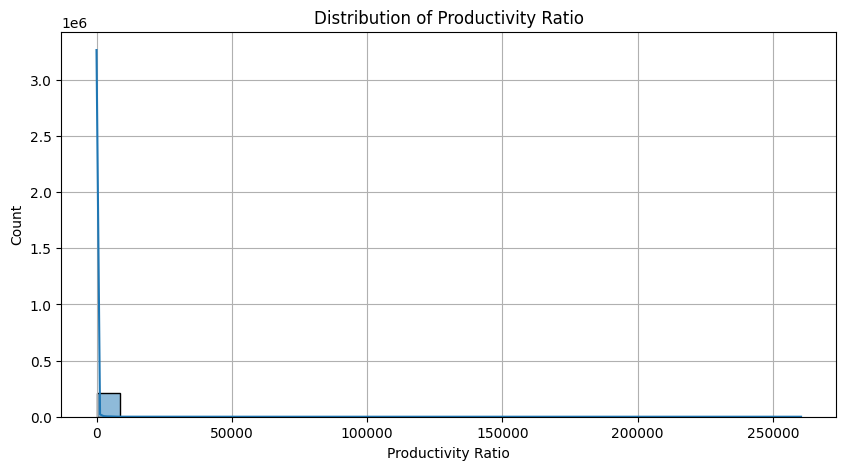

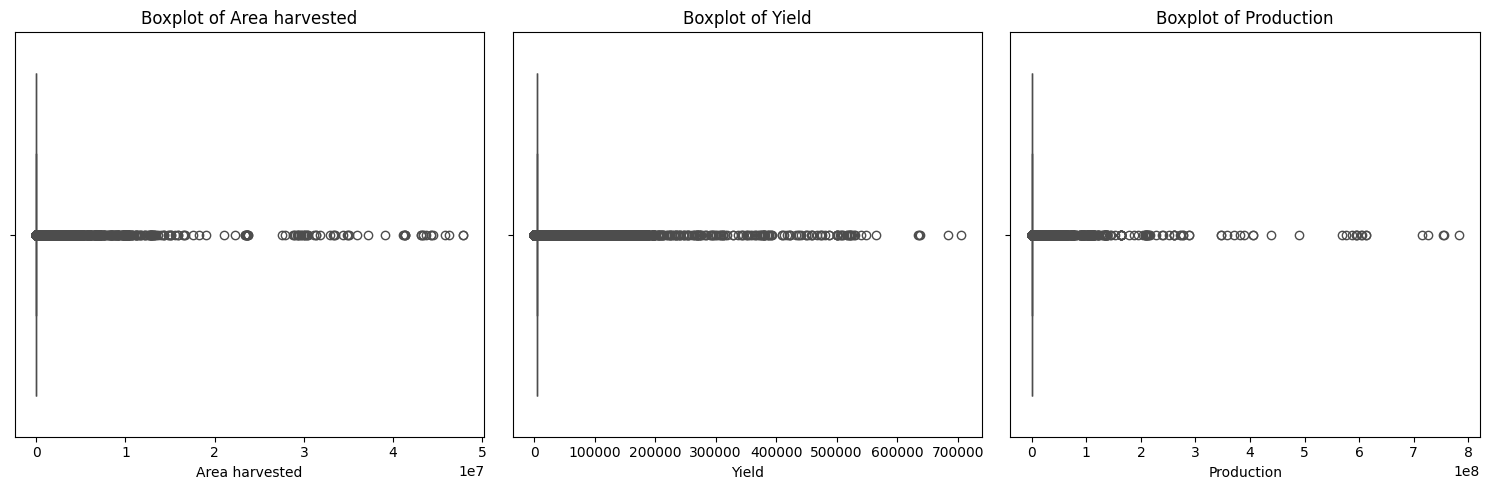

In [22]:
# Analyze Crop Distribution
def crop_distribution(df2):
    # Crop Types
    # Top 10 Most Cultivated Crops
    plt.Figure(figsize=(10,5))
    item=df2['Item'].value_counts().nlargest(10)
    sns.barplot(x=item.values,y=item.index,palette='viridis')
    plt.title("Top 10 Most Cultivated Crops")
    plt.xlabel('Frequency')
    plt.ylabel('Crop Type')
    plt.show()
    # Top 10 Least Cultivated Crops
    plt .figure(figsize=(10,5))
    item1=df2['Item'].value_counts().nsmallest(10)
    sns.barplot(x=item1.values,y=item1.index,color='green')
    plt.title('Top 10 Least Cultivated Crops')
    plt.xlabel('Frequency')
    plt.ylabel('Crop Type')
    plt.show()

    # Geographical Distribution
    plt.Figure(figsize=(10,5))
    area=df2['Area'].value_counts().nlargest(10)
    sns.barplot(x=area.values,y=area.index,palette='magma')
    plt.title("Top 10 Higest Agricultural Regions")
    plt.xlabel("Total Count")
    plt.ylabel("Region")
    plt.show()

# Temporal Analysis
def Temporal_Analysis(df2):
    # Yearly Trends
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df2,x='Year',y='Area harvested',label='Area harvested')
    sns.lineplot(data=df2,x='Year',y='Yield',label='Yield')
    sns.lineplot(data=df2,x='Year',y='Production',label='Production')
    plt.title("Yearly Trends")
    plt.xlabel("Year")
    plt.ylabel("Values")
    plt.grid()
    plt.show()
    
    # Growth Analysis
    production = df2.groupby("Area")["Production"].sum().nlargest(10).reset_index()
    plt.figure(figsize=(10,5))
    sns.lineplot(data=production, x="Area", y="Production",marker="o", color="b",linestyle='--')
    plt.title("Top 10 Regions with Highest Production")
    plt.xticks(rotation=45)
    plt.xlabel("Region")
    plt.ylabel("Total Production")
    plt.grid()
    plt.show()

    Yield= df2.groupby("Area")["Yield"].sum().nlargest(10).reset_index()
    plt.figure(figsize=(10,5))
    sns.lineplot(data=Yield, x="Area", y="Yield",marker="v", color="r",linestyle='--')
    plt.title("Top 10 Regions with Highest Yield")
    plt.xticks(rotation=45)
    plt.xlabel("Region")
    plt.ylabel("Total Yield")
    plt.grid()
    plt.show()

# Environmental Relationship
def Environmental_Relationships(df2):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df2, x="Area harvested", y="Yield", alpha=0.3, color='blue')
    plt.hexbin(df2["Area harvested"], df2["Yield"], gridsize=50, cmap="Blues", mincnt=1)
    plt.xscale("log")  
    plt.title("Impact of Area Harvested on Yield")
    plt.xlabel("Area Harvested (ha)")
    plt.ylabel("Yield")
    plt.colorbar(label="Density of Points") 
    plt.show()

# Input_Output_Relationships
def Input_Output_Relationships(df2):
    correlation_matrix = df2[["Area harvested", "Yield", "Production"]].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation between Area Harvested, Yield, and Production")
    plt.show()
     
# Comparative_Analysis
def Comparative_Analysis(df2):
    # Across Crops
    crop_yield = df2.groupby("Item")["Yield"].mean().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    # Top 10 high-yield crops
    plt.subplot(1, 2, 1)
    sns.barplot(y=crop_yield.index[:10], x=crop_yield.values[:10], palette="Greens_r")
    plt.xlabel("Average Yield")
    plt.ylabel("Crop")
    plt.title("Top 10 High-Yield Crops")

    # Bottom 10 low-yield crops
    plt.subplot(1, 2, 2)
    sns.barplot(y=crop_yield.index[-10:], x=crop_yield.values[-10:], palette="Reds_r")
    plt.xlabel("Average Yield")
    plt.ylabel("Crop")
    plt.title("Top 10 Low-Yield Crops")
    plt.tight_layout()
    plt.show()
    
    # Across Regions
    region_production=df2.groupby('Area')['Production'].mean().sort_index(ascending=False)
    plt.figure(figsize=(10,5))
    sns.barplot(y=region_production.index[:10],x=region_production.values[:10],palette='viridis')
    plt.title("Top 10 highly Productive Regions ")
    plt.xlabel("Total Production")
    plt.ylabel("Region")
    plt.show()
   
    # Productivity Analysis
    crop=df2.groupby('Item')['Yield'].mean().sort_values(ascending=False).head(10)
    region=df2.groupby('Area')['Yield'].mean().sort_values(ascending=False).head(10)

    plt.figure(figsize=(10,5))
    sns.barplot(x=crop.index,y=crop.values,palette='viridis')
    plt.xticks(rotation=45)
    plt.xlabel("Crop")
    plt.ylabel("Average Yield")
    plt.title("Top 10 High-Yield Crops")
    plt.show()
    plt.show()

    plt.figure(figsize=(10,5))
    sns.barplot(x=region.index,y=region.values,palette='viridis')
    plt.xticks(rotation=45)
    plt.xlabel("Region")
    plt.ylabel("Average Yield")
    plt.title("Top 10 High-Yield Regions")
    plt.show()

    pro_col="Production"
    area_col="Area harvested"

    df2['Productivity Ratio']=df2[pro_col]/ df2[area_col]

    plt.figure(figsize=(10,5))
    sns.histplot(df2['Productivity Ratio'],bins=30,kde=True)
    plt.title("Distribution of Productivity Ratio")
    plt.xlabel("Productivity Ratio")
    plt.grid()
    plt.show()
        
# Outliers and Anomalies
def Outliers_dect(df2):
    columns_to_check = ['Area harvested', 'Yield', 'Production']

    plt.figure(figsize=(15,5))

    for i, col in enumerate(columns_to_check, 1):
        plt.subplot(1, 3, i)  
        sns.boxplot(data=df2, x=col, color="b")
        plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

def run_eda(df2):
    crop_distribution(df2)
    Temporal_Analysis(df2)
    Environmental_Relationships(df2)
    Input_Output_Relationships(df2)
    Comparative_Analysis(df2)
    Outliers_dect(df2)
run_eda(df2)

# Machine Learning Model

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


data1=pd.read_csv('C:/Users/Admin/Desktop/DS PROJECT/crop production ML project/agriculture.csv')

# preprocess the data
# We Have categorical Values like 'Domain','Area','Item','Unit' and we have convert the columns into numerical
# using Labelencoder to convert the categorical into numerical

label_encoder=LabelEncoder()
for col in ['Domain', 'Area', 'Item', 'Unit']:
    data1[col]=label_encoder.fit_transform(data1[col])

# split the data into  features and Target 
x=data1.drop(columns=['Production']) # feature (Domain','Area','Item','Unit)
y=data1['Production']

# split the dataset into traning and testing sets 80% training 20% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Train a randomforest model
rf_model=RandomForestRegressor(n_estimators=100,random_state=42) # 100 trees in the forest
rf_model.fit(x_train,y_train)

# make prediction on the test set
y_pred=rf_model.predict(x_test)

# evalution Metrics 
print("\n mean absolute error:",mean_absolute_error(y_test,y_pred))
print("\n Mean square error:",mean_squared_error(y_test,y_pred))
print("\nRoot Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("\n r2 score:",r2_score(y_test,y_pred))


In [ ]:
pip install streamlit joblib

In [26]:
# import joblib and save the model
import joblib
jb = joblib.dump(rf_model, r"C:\Users\Admin\Desktop\DS PROJECT\crop production ML project\model.pkl")